<a href="https://colab.research.google.com/github/SaifuliAnna/DataScience_HW4/blob/main/Second_true_Hw4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Пусть все население ($N$ индивидов) делится на три группы: индивиды, которые восприимчивы к данной болезни, но здоровы (susceptible) — $S(t)$; зараженные индивиды (infected) — $I(t)$ (они больны сами и являются носителями болезни) и здоровые индивиды, обладающие иммунитетом к данной болезни (recovered) — $R(t)$.

Примем, что

(1)$$S(t)+I(t)+R(t)=N$$

Считаем, что когда число инфицированных превышает некое фиксированное значение $I^∗$, скорость изменения числа восприимчивых к болезни индивидов будет пропорционально числу самих восприимчивых индивидов.

(2)$${dS\over​dt}= -\alpha{S}$$

Теперь, когда каждый восприимчивый к болезни индивид в конце концов заболевает и становится инфекционным, то скорость изменения инфицированных индивидов это разность за единицу времени между вновь заболевшими и теми кто выздоравливает.

(3)$${dI\over​dt}= \alpha{S}-\beta{I}$$

Постоянные пропорциональности $α$ и $β$ называют коэффициентами заболеваемости и выздоровления соответственно.

Скорость изменения числа выздоравливающих индивидов:

(4)$${dR\over​dt}= \beta{I}$$

Для того, чтобы решения соответствующих уравнений определялись однозначно, необходимо задать начальные условия. Примем, что:


*   $α=0.5$
*   $β=0.3$
*   $N=1000000$
*   $S(0)=990000$
*   $I(0)=7000$
*   $R(0)=3000$
*   $t$0​, $t$f$​=0, 25$

Необходимо выполнить:


## 1.Решить дифференциальное уравнение (2) $${dS\over​dt}= -\alpha{S}$$и построить график функции $S(t)$

In [9]:
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

In [10]:
α = 0.5
𝛽 = 0.3
n = 1000000
s0 = 990000
i0 = 7000
r0 = n - s0 - i0
tf = 25

In [13]:
graph = np.linspace(0, tf, n)

def mod(y, t, n, α, 𝛽):
    S, I, R = y
    dsdt = - α * S
    didt = (α * S) - (𝛽 * I)
    drdt = 𝛽 * I
    return dsdt, didt, drdt

y0 = s0, i0, r0
diff = odeint(mod, y0, graph, args = (n, α, 𝛽))
s0, i0, r0 = np.transpose(diff)

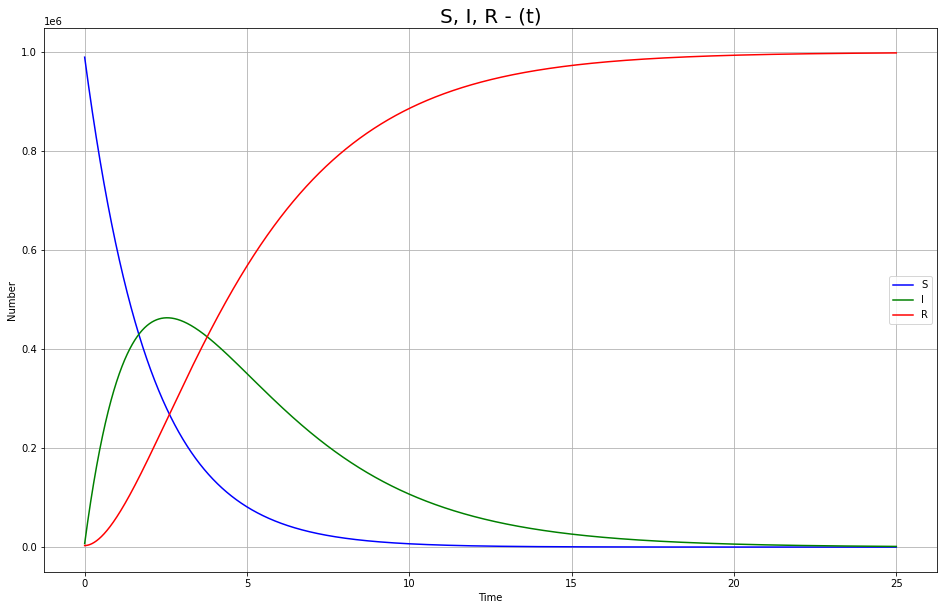

In [21]:
fig, ax = plt.subplots(figsize=(16, 10))

plt.plot(graph, s0, 'b', label='S')
plt.plot(graph, i0, 'g', label='I')
plt.plot(graph, r0, 'r', label='R')

plt.title('S, I, R - (t)', size = 20, color = 'k')
plt.xlabel('Time')
plt.ylabel('Number')
plt.legend()
plt.grid()
plt.show()